In [1]:
import os
import gc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.transform import resize

from sklearn.model_selection import train_test_split

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import optimizers

In [2]:
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 10

In [3]:
# Paths: For local machine
# data_dir = 'C:/Users/Nick/Desktop/stock images/train'
# categories = ['chan_down', 'chan_up', 'doub_bot', 'doub_top', 'hs', 'tri', 'wed_down', 'wed_up']

# Paths: For local machine
train_dir = 'C:/Users/Nick/Desktop/stock images/train'
validation_dir = 'C:/Users/Nick/Desktop/stock images/validation'


# train_dir = 'C:/Users/Nick/Documents/SchoolStuff/spring2024/machineLearning/final_project/tradingpatterns/stock_patterns/train'
# validation_dir = 'C:/Users/Nick/Documents/SchoolStuff/spring2024/machineLearning/final_project/tradingpatterns/stock_patterns/validation'

In [4]:
# def mapto1hot(ytrain, yval, ytest):
#     # One hot encoding for the number of categories we will be looking at.,
#     ytrain_1hot = keras.utils.to_categorical(ytrain, num_classes = len(categories))
#     yval_1hot = keras.utils.to_categorical(yval, num_classes = len(categories))
#     ytest_1hot = keras.utils.to_categorical(ytest, num_classes = len(categories))
#     
#     return ytrain_1hot, yval_1hot, ytest_1hot

In [5]:
# def convert_images(data: list, labels: list):
#     for category_idx, category in enumerate(categories):
#         count = 0
#         
#         for file in os.listdir(data_dir + '/' + category):
#             image = imread(data_dir + '/' + category + '/' + file)
#             image = resize(image, (IMG_SHAPE, IMG_SHAPE))
#             data.append(image)
#             labels.append(category_idx)
#             count += 1
#             if count > 4000:
#                 break
#             
#     return data, labels

In [6]:
def show_history(history):    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='upper right')
    plt.ylabel('Accuracy')
    plt.ylim([0,0.3])
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [7]:
# data = []
# labels = []

In [8]:
# data, labels = convert_images(data, labels)
# data1 = np.asarray(data)
# labels1 = np.asarray(labels)
# # Split data into train and test sets using 42 to make reproducable results
# xtrain, xtest, ytrain, ytest = train_test_split(data1, labels1, test_size=0.2, random_state=42, shuffle=True, stratify=labels1)

# # Normalize the data by dividing 1 by 255 (rgb value),
# xtrain = xtrain/255
# xtest = xtest/255
# 
# # Create validation set
# xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2)
# 
# # One Hot Encoding
# ytrain_1hot, yval_1hot, ytest_1hot = mapto1hot(ytrain, yval, ytest)

In [18]:
# Create training and validation dataset
train_ds  = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=(IMG_SIZE, IMG_SIZE))

val_ds  = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=(IMG_SIZE, IMG_SIZE))
class_names = train_ds.class_names

Found 67613 files belonging to 8 classes.
Found 19833 files belonging to 8 classes.


In [ ]:
# Test fucntion to see how the images work with this pixal count
# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [20]:
# Create a test set
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [21]:
# Create a test set
val_batches = tf.data.experimental.cardinality(val_ds)
test_dataset = val_ds.take(val_batches // 5)
validation_dataset = val_ds.skip(val_batches // 5)

In [44]:
num_classes = len(class_names)
model = keras.Sequential([
    keras.layers.Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes,  activation='softmax')
])

In [45]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [46]:
epochs = 10
history = model.fit(train_ds,
                    validation_data=val_ds,
                    steps_per_epoch=10,
                    epochs=epochs,
                    validation_steps=10)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step - accuracy: 0.1301 - loss: 4.8414 - val_accuracy: 0.1031 - val_loss: 2.0974
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step - accuracy: 0.0798 - loss: 2.1043 - val_accuracy: 0.1781 - val_loss: 2.0643
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step - accuracy: 0.1071 - loss: 2.0836 - val_accuracy: 0.2094 - val_loss: 2.0755
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - accuracy: 0.1533 - loss: 2.0782 - val_accuracy: 0.1969 - val_loss: 2.0748
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step - accuracy: 0.1994 - loss: 2.0739 - val_accuracy: 0.2031 - val_loss: 2.0390
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - accuracy: 0.1701 - loss: 2.0704 - val_accuracy: 0.2094 - val_loss: 2.0527
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - accuracy: 0.1596 - loss: 2.0707 - val_accuracy: 0.2062 - val_loss: 2.0558
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step - accuracy: 0.1334 - loss: 2.0759 - val_accuracy: 0.

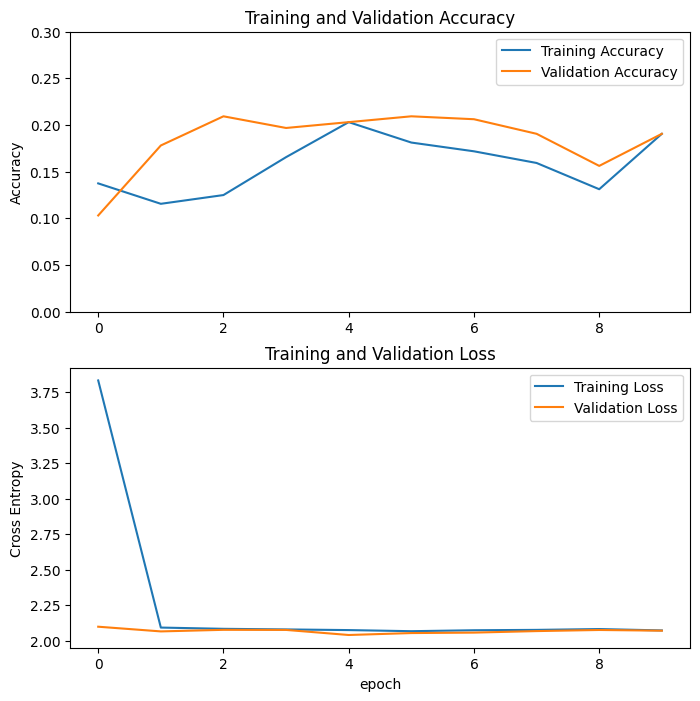

In [47]:
show_history(history)

In [37]:
gc.collect()

27730